# Simple UVES example

First load all modules we need

In [1]:
%matplotlib inline
import pyreduce
from pyreduce import datasets

Define the parameters of this run, like instrument and target.
Note that these values should be the same as in the FITS files (especially important for the target) and can also be used in the directory names below.

In [10]:
instrument = "UVES"
target = "HD132205"
night = "2010-04-01"
mode = "middle"
steps = ("bias", 
         "flat", 
         "orders", 
         "norm_flat", 
         "wavecal", 
         "curvature", 
         "science", 
         "continuum", 
         "finalize"
        )

Define the input and output directories, that will be used. These will be relative to the base_dir.
In this example the base_dir will be the PyReduce/examples folder as given by the datasets.
If you want to use relative paths set base_dir to "./", or for completely unrelated paths use base_dir = "".

In [7]:
# load dataset (and save the location)
base_dir = datasets.UVES_HD132205()
input_dir = "{target}/"
output_dir = "reduced/{instrument}/{target}/{night}/{mode}"

In [8]:
config = {
    "__instrument__": "UVES",
    "reduce": {
        "input_dir": "{target}/",
        "output_dir": "reduced/{instrument}/{target}/{night}/{mode}"
    },
    "orders": {
        "degree": 4,
        "filter_size": 80,
        "min_cluster": 2000,
        "noise": 8,
        "manual": True
    },
    "norm_flat": {
        "smooth_slitfunction": 2,
        "smooth_spectrum": 0,
        "extraction_width": 0.45,
        "oversampling": 12,
        "swath_width": 200,
        "threshold": 1000
    },
    "wavecal": {
        "threshold": 100,
        "dimensionality": "2D",
        "degree": [6, 6],
        "manual": False
    },
    "freq_comb": {
        "dimensionality": "2D",
        "degree": [6, 6]
    },
    "curvature": {
        "dimensionality": "1D",
        "degree": 2
    },
    "science": {
        "oversampling": 1,
        "extraction_width": 0.2,
        "swath_width": 300,
        "smooth_slitfunction": 0.1,
        "smooth_spectrum": 0
    }
}

With everything set up, we can run PyReduce. Results will be set stored in the ouput dir.

INFO - Instrument: UVES
INFO - Target: HD132205
INFO - Observation Date: 2010-04-01
INFO - Instrument Mode: middle
INFO - Group Identifier: 600.0nm
INFO - Loading data from step 'mask'
WARNING - /home/ansgar/anaconda3/lib/python3.6/site-packages/astropy/io/fits/card.py:711: AstropyUserWarning: The following header keyword is invalid or follows an unrecognized non-standard convention:
OS-EXPOID=                5551          / OS expoId                             
  self._image), AstropyUserWarning)

INFO - Running step 'bias'
INFO - Files:
INFO - 0	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T10_58_33.495.fits.gz
INFO - 1	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T10_58_52.147.fits.gz
INFO - Files:
INFO - 0	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T10_59_11.799.fits.gz
INFO - 1	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T1

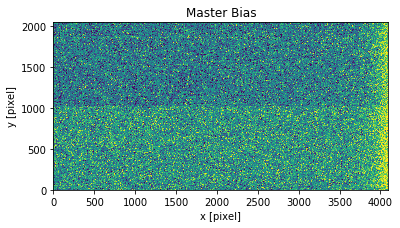

INFO - Running step 'flat'
INFO - Files:
INFO - 0	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T11_04_33.737.fits.gz
INFO - 1	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T11_08_00.554.fits.gz
INFO - 2	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T11_05_42.542.fits.gz
INFO - 3	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T11_06_51.888.fits.gz
INFO - 4	/home/ansgar/Documents/Python/PyReduce/pyreduce/../datasets/HD132205/UVES.2010-04-02T11_03_24.401.fits.gz
INFO - total cosmic ray hits identified and removed: 8358


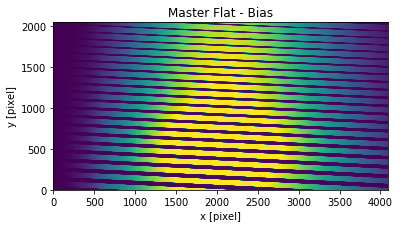

In [11]:
pyreduce.reduce.main(
    instrument,
    target,
    night,
    mode,
    steps,
    base_dir=base_dir,
    input_dir=input_dir,
    output_dir=output_dir,
    configuration=config,
    order_range=(1, 21),
)
